In [28]:
import pandas as pd 
import numpy as np 

Import the Data sets  

In [60]:
data = pd.read_csv('measurements.csv')
data_2 = pd.read_excel('measurements2.xlsx')
print(data.dtypes)
data.head()

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [55]:
def data_cleaning(df):
    new_cols = []
    for i in range(len(df.columns)):
        new_cols.append(df.columns[i].lower().replace(' ', '_'))
    df.columns = new_cols
    
    lst = ['distance', 'consume', 'temp_inside']
    for col in lst: 
        df[col] = df[col].str.replace(',', '.')
    return df

In [56]:
data_1_clean = data_cleaning(data)

In [57]:
print(data_1_clean.dtypes)

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
ac                int64
rain              int64
sun               int64
refill_liters    object
refill_gas       object
dtype: object


In [58]:
# Transform data types to float 
data_1_clean['distance'] = data_1_clean['distance'].astype(float)
data_1_clean['consume'] = data_1_clean['consume'].astype(float)
data_1_clean['temp_inside'] = data_1_clean['temp_inside'].astype(float)

In [59]:
print(data_1_clean.dtypes)

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object


Let's inspect the second data set:

In [61]:
print(data_2.dtypes)
data_2.head()

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [64]:
#They seem to have the same information, could be an duplicate data set. 
# Check by merging by outer values, if the resutl is 0, they are the same set , different format

data_1_clean.merge(data_2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
# Results in an epmty DF, because we dropped duplicates, so its the same dataset => No new information 

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,AC,refill liters,refill gas


In [65]:
data_1_clean['speed'].unique()

array([26, 30, 38, 36, 46, 50, 43, 40, 42, 59, 58, 24, 32, 39, 37, 62, 57,
       21, 28, 29, 35, 51, 23, 55, 44, 25, 63, 61, 82, 52, 18, 41, 20, 56,
       45, 22, 60, 33, 34, 71, 75, 66, 27, 49, 14, 80, 53, 47, 73, 69, 85,
       67, 54, 31, 48, 16, 88, 65, 90, 87])

Assumptions:

    - "distance' in KM 
    
    - "cosume" comes in litres per 100 Km
    
    - "speed" is average of Km/h
    
    - "temperature' in Celsius 
    
    - AC, rain or sun are weather conditions of the trip 

EXPLORATORY DATA ANALYSIS 

In [66]:
data_1_clean.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [67]:
# % of Null or NaN values
data_1_clean.isna().sum()/len(data_1_clean)*100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

In [69]:
# I am dropping 'specials' ( the info is in 'rain' and 'sun' columns, refill_litres , and refill_gas 
cols_to_drop = ['specials', 'refill_liters', 'refill_gas']
df = data_1_clean.drop(cols_to_drop, axis=1)
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [72]:
df["temp_inside"].isna().sum()/len(df)*100

3.0927835051546393

With 3% of NaN values, makes sense to fill them with the mode 

In [73]:
mode = df.temp_inside.mode()
df.temp_inside.fillna(mode[0], inplace=True)

In [74]:
df.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

In [131]:
#Current price of GAS in Europe 
SP98 = 2.18  # €/l
E10 = 2.03 # €/l
# We create the features thayt will be useful for visualization
df['fuel_use'] = df.distance * df.consume/100
df['cost_trip'] = np.where(df.gas_type == 'E10', df.fuel_use*E10, df.fuel_use*SP98).round(2)
df['trip_time'] = df.speed/60
df['avg_speed'] = df.distance/df.trip_time

In [137]:
# Saving the clean data in a csv format
df.to_csv('cobify_clean_data.csv', index = False)

VISUALIZATIONS

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

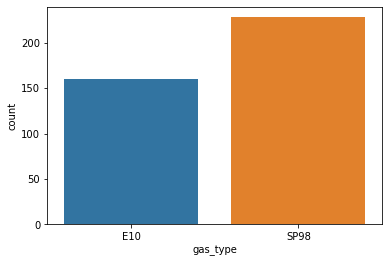

In [134]:
fig,ax = plt.subplots()
sns.countplot(x=df.gas_type)
plt.show()

# The plot shows SP98 is more commonly used in the data collected.

In [135]:
# Lets select numericals (not fuel_type)
df_num = df.select_dtypes(np.number)
df_num

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,fuel_use,cost_trip,trip_time,avg_speed
0,28.0,5.0,26,21.5,12,0,0,0,1.4000,2.84,0.433333,64.615385
1,12.0,4.2,30,21.5,13,0,0,0,0.5040,1.02,0.500000,24.000000
2,11.2,5.5,38,21.5,15,0,0,0,0.6160,1.25,0.633333,17.684211
3,12.9,3.9,36,21.5,14,0,0,0,0.5031,1.02,0.600000,21.500000
4,18.5,4.5,46,21.5,15,0,0,0,0.8325,1.69,0.766667,24.130435
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0.5920,1.29,0.650000,24.615385
384,16.1,4.3,38,25.0,31,1,0,0,0.6923,1.51,0.633333,25.421053
385,16.0,3.8,45,25.0,19,0,0,0,0.6080,1.33,0.750000,21.333333
386,15.4,4.6,42,25.0,31,1,0,0,0.7084,1.54,0.700000,22.000000


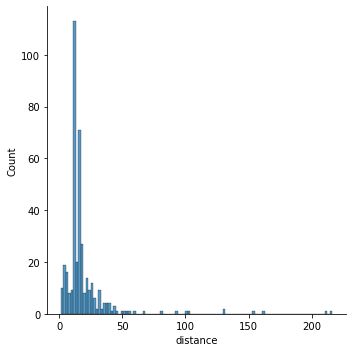

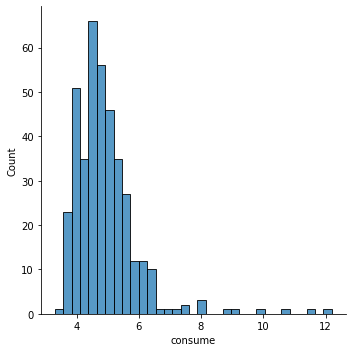

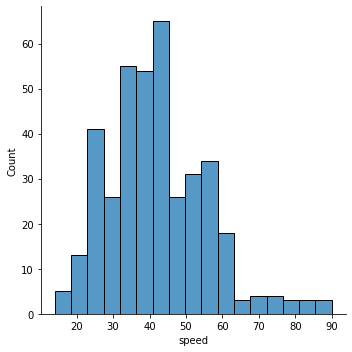

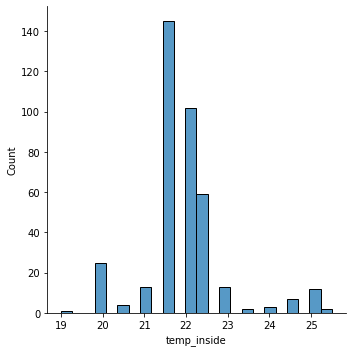

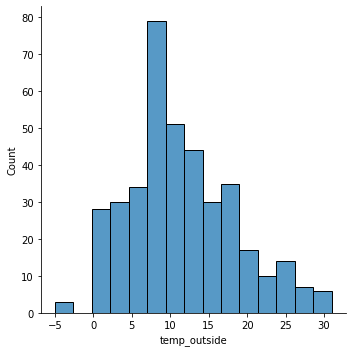

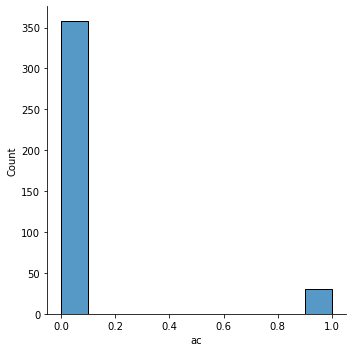

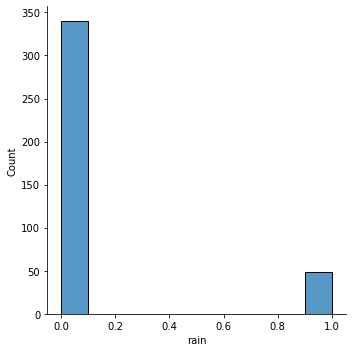

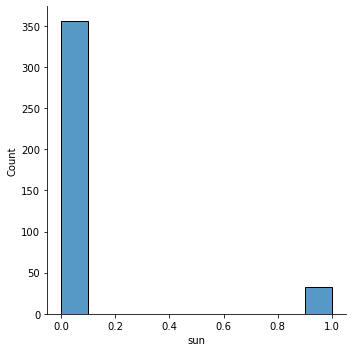

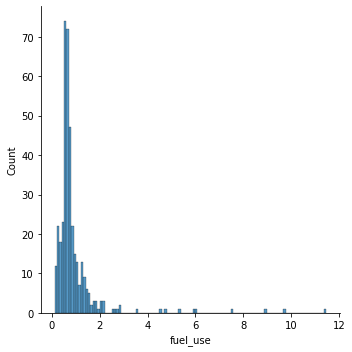

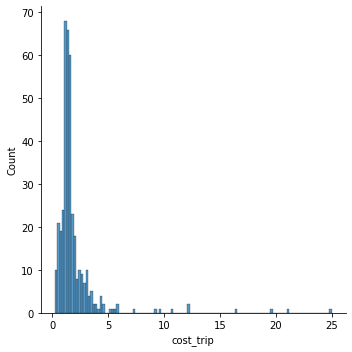

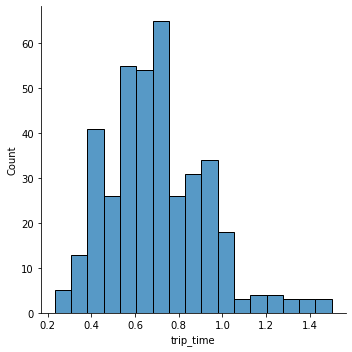

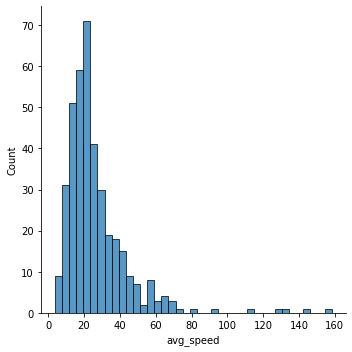

In [136]:
# Distributions of the different numerical columns
for col in df_num:
    sns.displot(df_num[col])
    plt.show

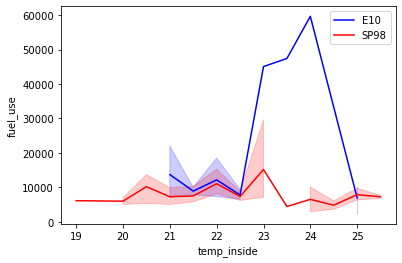

In [107]:
fig,ax = plt.subplots()
col_e10 = df[df.gas_type=='E10']
col_sp98 = df[df.gas_type=='SP98']

ax1 = sns.lineplot(data=col_e10, x=col_e10.temp_inside, y=col_e10.fuel_use, label= "E10", color='blue')
ax2 = sns.lineplot(data=col_sp98, x=col_sp98.temp_inside,y=col_sp98.fuel_use, label= "SP98", color='red')
plt.show()
# ax3 = sns.lineplot(data=col_e10, x=col_e10.temp_outside, label= "E10 temp outside")
# ax4 = sns.lineplot(data=col_sp98, x=col_sp98.temp_outside, label= "SP98 temp outside")


When the temoperarure inside is high , the fule consumtion rises (Air Cooling use) but more significantly with E10 

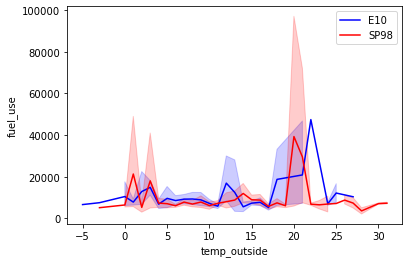

In [108]:
fig,ax = plt.subplots()
col_e10 = df[df.gas_type=='E10']
col_sp98 = df[df.gas_type=='SP98']
ax1 = sns.lineplot(data=col_e10, x=col_e10.temp_outside, y=col_e10.fuel_use, label= "E10", color='blue')
ax2 = sns.lineplot(data=col_sp98, x=col_sp98.temp_outside,y=col_sp98.fuel_use, label= "SP98", color='red')
plt.show()

We convert gas_type into a boolean as there are only 2 values


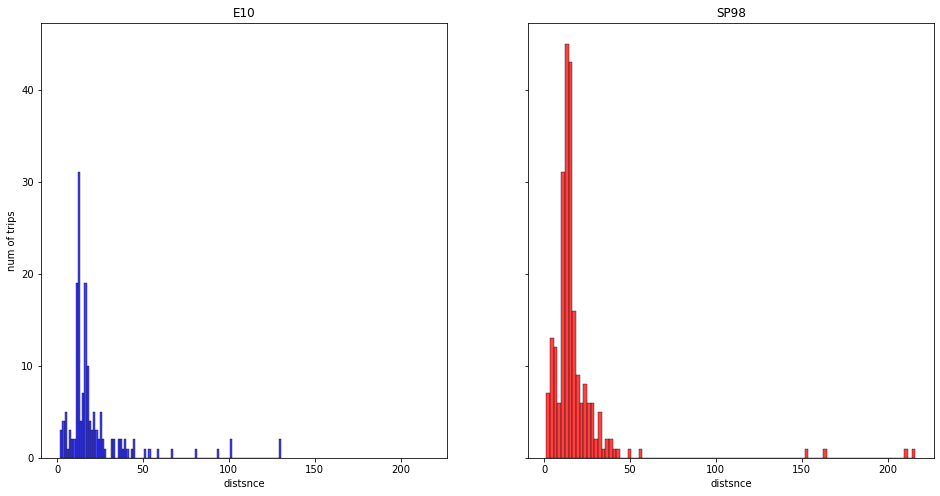

In [110]:
fig,axes = plt.subplots(1,2,figsize=(16,8), sharey=True, sharex=True)
col_e10 = df[df.gas_type=='E10']
col_sp98 = df[df.gas_type=='SP98']
sns.histplot(ax=axes[0], data=col_e10.distance, bins=100,label='E10', color='blue').set(title="E10")
axes[0].set(xlabel="distsnce", ylabel='num of trips')

sns.histplot(ax=axes[1], data=col_sp98.distance, bins=100,label='SP98', color='red').set(title="SP98")
axes[1].set(xlabel="distsnce", ylabel='num of trips')
plt.ylabel('num of trips')

plt.show()
# SP98 is used in loger diostances

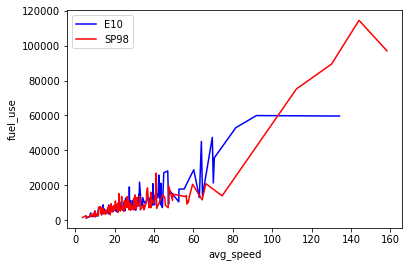

In [118]:
fig,ax = plt.subplots()
col_e10 = df[df.gas_type=='E10']
col_sp98 = df[df.gas_type=='SP98']

ax1 = sns.lineplot(data=col_e10, x=col_e10["avg_speed"], y=col_e10["fuel_use"], label = 'E10', color='blue')
ax2 = sns.lineplot(data=col_sp98, x=col_sp98["avg_speed"], y=col_sp98["fuel_use"], label = 'SP98', color='red')
plt.legend(loc="upper left")
plt.show()

# We can see the consumption stabilizes after reaching 100 km/h for E10 fuel 
# SP98 consumption increases significantly in higher speeds

Conclusions:


Suggestions: 

-- At higher speeds E10 fuel is more efficient. 

-- There is not much difference for short distances or quick trips.

-- E10 fuel is cheaper so, makes sense to adopt it across the company.

-- The use of SP98 in longer trips makes them more expensive, I would suggest using E10 for longer trips as well.
